### The World Cup: Germany vs. Argentina

This is a continuation of the Bayesian World Cup series: Allen Downey. has been posting neat little Bayesian problems and suggesting others replicating the solution in their frameworks of choice:

1. [Part 1: The World Cup Problem: Germany v. Brazil ](http://allendowney.blogspot.ca/2014/11/the-world-cup-problem-germany-v-brazil.html)
2. [Part 2: The World Cup Problem Part 2: Germany v. Argentina](http://allendowney.blogspot.ca/2014/11/the-world-cup-problem-part-2-germany-v.html)

My other solution to the first problem is [available here](http://nbviewer.ipython.org/gist/CamDavidsonPilon/7bcdebce13959964269f). 

In [ ]:
import pymc as pm

%pylab inline
figsize(12,6)

In [3]:
avg_goals_per_team = 1.34
duration_of_game = 93.

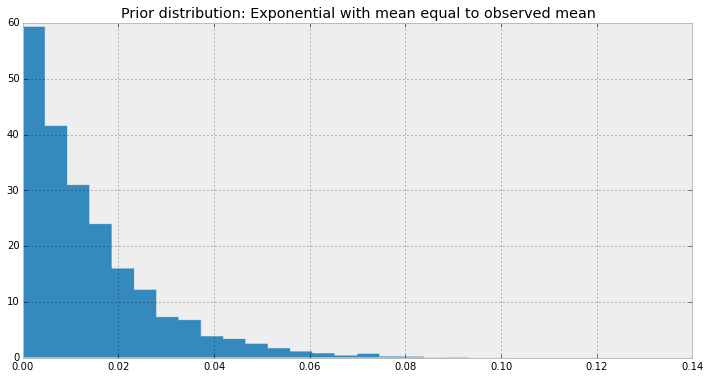

In [34]:
german_prior = pm.Exponential('german_prior', duration_of_game/avg_goals_per_team)
arg_prior = pm.Exponential('arg_prior', duration_of_game/avg_goals_per_team)

sample = np.array([german_prior.random() for i in range(10000)])
hist(sample, bins=30, normed=True, histtype='stepfilled');
plt.title('Prior distribution: Exponential with mean equal to observed mean');

In [19]:
germany = pm.Poisson('germany_obs', german_prior, observed=True, value=[1])
argentina = pm.Poisson('arg_obs', arg_prior, observed=True, value=[0])

germany_predictive = pm.Poisson('germany_predictive', duration_of_game*german_prior)
arg_predictive = pm.Poisson('arg_predictive', duration_of_game*arg_prior)

In [20]:
mcmc = pm.MCMC([germany, argentina, german_prior, arg_prior, germany_predictive, arg_predictive])

In [21]:
mcmc.sample(20000, 5000)

 [-----------------100%-----------------] 20000 of 20000 complete in 5.5 sec

In [22]:
german_lambda_trace = mcmc.trace('german_prior')[:]
arg_lambda_trace = mcmc.trace('arg_prior')[:]

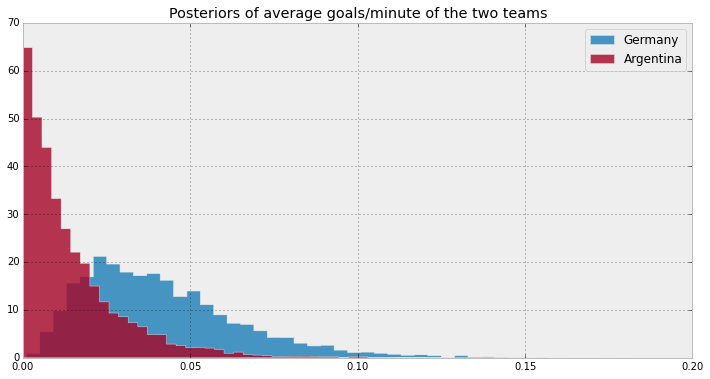

In [30]:
hist(german_lambda_trace, bins=45, histtype='stepfilled', label='Germany', alpha=0.9, normed=True);
hist(arg_lambda_trace, bins=45, histtype='stepfilled', label='Argentina', alpha=0.8, normed=True);
plt.legend();
plt.title('Posteriors of average goals/minute of the two teams');

In [24]:
german_post_trace = mcmc.trace('germany_predictive')[:]
arg_post_trace = mcmc.trace('arg_predictive')[:]

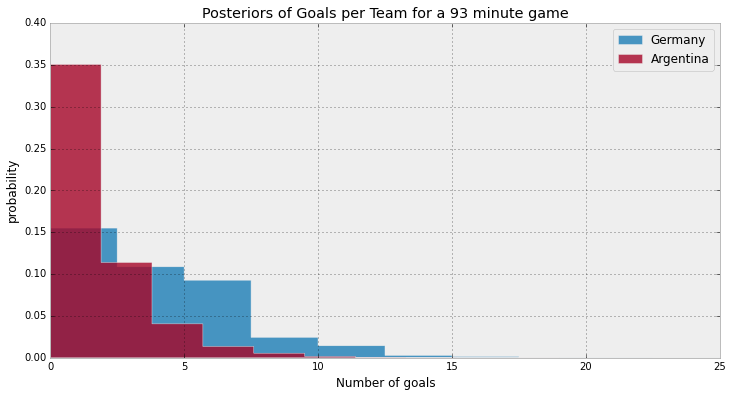

In [31]:
hist(german_post_trace, bins=10, histtype='stepfilled', label='Germany', alpha=0.9, normed=True);
hist(arg_post_trace, bins=10, histtype='stepfilled', label='Argentina', alpha=0.8, normed=True);
plt.legend();
plt.title('Posteriors of Goals per Team for a 93 minute game');
plt.ylabel('probability')
plt.xlabel('Number of goals')

In [33]:
print "Probability of Germany winning: %.3f"%(german_post_trace > arg_post_trace).mean()
print "Probability of Argentina winning: %.3f"%(german_post_trace < arg_post_trace).mean()
print "Probability of tie: %.3f"%(german_post_trace == arg_post_trace).mean()

Probability of Germany winning: 0.728
Probability of Argentina winning: 0.159
Probability of tie: 0.113


Again, the differences between my solution and Allen's is due to the differences in our priors =)